<a href="https://colab.research.google.com/github/ayshahaneena/MNIST-Digit-Classification/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loading MNIST Data

As this Dataset is from keras we don't have to do the Image Preprocessing

In [47]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [48]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* Training Data = 60000
* Testing Data = 10000
* Image Dimension = 28 * 28
* GrayScale Image ----> 1 Channel


In [49]:
type(x_train)

numpy.ndarray

In [50]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

### Displaying Image

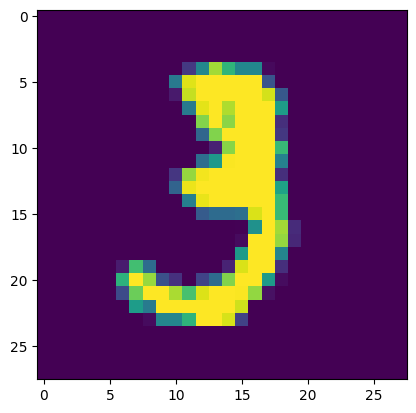

------------------------------------------------------
Label:  3


In [51]:
plt.imshow(x_train[10])
plt.show()

# corresponding Label
print('------------------------------------------------------')
print('Label: ',y_train[10])

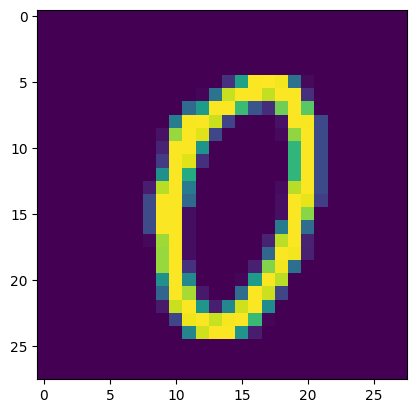

------------------------------------------------------
Label:  0


In [52]:
plt.imshow(x_train[1000])
plt.show()

# corresponding Label
print('------------------------------------------------------')
print('Label: ',y_train[1000])

### Labels of Images

In [53]:
# Unique Values in y_train
print(np.unique(y_train))

# Unique Values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [54]:
x_train[5000].shape

(28, 28)

In [55]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))


*  All the images are in same dimension , if not we would have to 'Resize' it


### Scaling Images

In [56]:
x_train[7000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [57]:
x_train = x_train/255
x_test = x_test/225

In [58]:
x_train[3999]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Building CNN

In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [60]:
model = Sequential()

model.add(Conv2D(16,(3,3) , activation='relu' , input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))
model.add(Conv2D(64,(3,3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 13, 13, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 5, 5, 32)        

### Compilation

In [63]:
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training Model

In [64]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 0.1767 - accuracy: 0.9447 - val_loss: 0.0422 - val_accuracy: 0.9852
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0344 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.0364 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0302 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0338 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0344 - val_accuracy

## Accuracy on Test Data

In [65]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9915


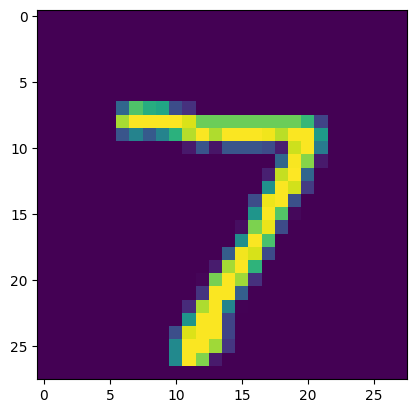

------------------------------------
Label:  7


In [66]:
# first Datapoint in x_test

plt.imshow(x_test[0])
plt.show()
print('------------------------------------')
print('Label: ',y_test[0])

In [67]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [68]:
print(y_pred[0])

[6.3067379e-13 9.7041504e-09 1.1610022e-09 5.7077578e-09 1.1123575e-11
 7.4947749e-11 4.3263329e-14 1.0000000e+00 7.9339031e-13 4.8156181e-09]


It shows the prediction probability of each class

In [69]:
# Converting prediction probability into class
np.argmax(y_pred[0])

7

In [73]:
# converting prediction probability into classes of all data points
y_pred_labels = [np.argmax(i) for i in y_pred]

y_test ----> True Labels

y_pred_labels ----> predicted Labels

In [75]:
# confusion Matrix
c_matrix = confusion_matrix(y_test , y_pred_labels)

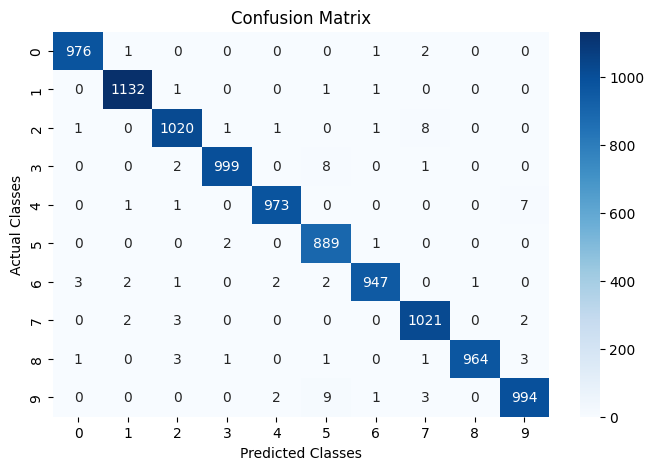

In [83]:
plt.figure(figsize=(8,5))
sns.heatmap(c_matrix , annot=True , fmt='d' , cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

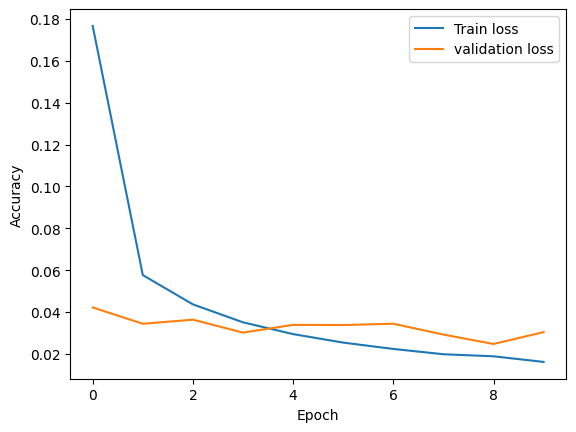

In [90]:
# Plot of loss
plt.plot(history.history['loss'] , label='Train loss')
plt.plot(history.history['val_loss'] , label='validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

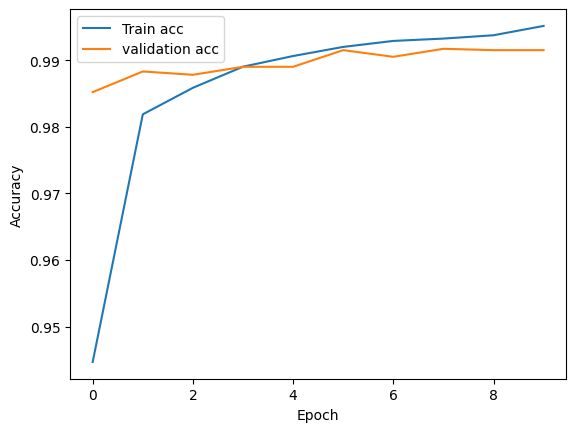

In [91]:
# Plot of accuracy
plt.plot(history.history['accuracy'] , label='Train acc')
plt.plot(history.history['val_accuracy'] , label='validation acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()